Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [4]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutori

In [5]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 19:37:19--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.39, 91.189.91.83, 91.189.91.82, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.39|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  1.33MB/s    in 0.9s    

2024-03-10 19:37:20 (1.33 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like pro

In [6]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5aec1f883460 at 0x789ac33ceef0>

Welcome to JupyROOT 6.28/04


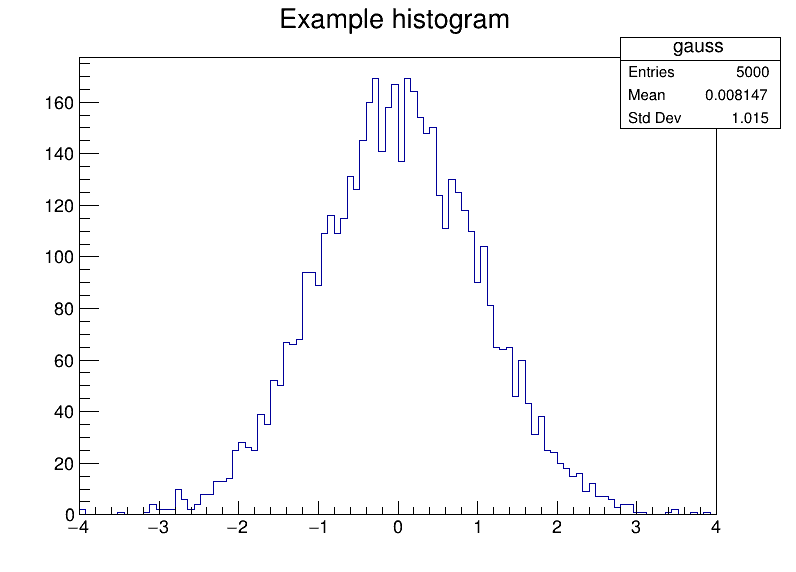

In [7]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [8]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-10 19:37:27--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  19.0MB/s    in 35s     

2024-03-10 19:38:03 (18.4 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PY cannot accommodate the value 4933.33
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PY cannot accommodate the value -6407.68
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 4381.61
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PZ cannot accommodate the value 5063.99
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 3305238 out-of-range events


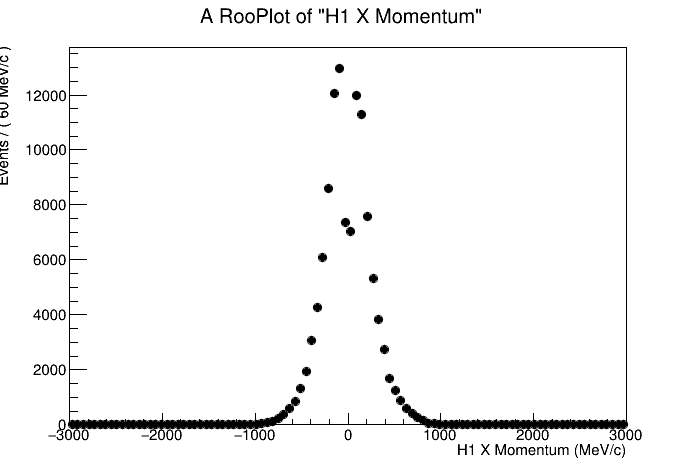

In [10]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

This was about as long as i could stomach using ROOT, everything from here on is done with uproot and numpy.

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [12]:
! pip install uproot
import uproot
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 26.9 MB/s eta 0:00:00


In [13]:
# From here i used uproot to work with the data, it has its downsides but is in general significantly less convoluted that using ROOT
root_file=uproot.open("/content/drive/MyDrive/B2HHH_MagnetUp.root")
# opens the right tree
tree2=root_file["DecayTree"]
# copies all the data into a numpy array
data=tree2.arrays()

In [14]:
# calculates the total momentum for each daughter
H1_Ptot=np.sqrt(data['H1_PX']**2+data['H1_PY']**2+data['H1_PZ']**2)
H2_Ptot=np.sqrt(data['H2_PX']**2+data['H2_PY']**2+data['H2_PZ']**2)
H3_Ptot=np.sqrt(data['H3_PX']**2+data['H3_PY']**2+data['H3_PZ']**2)

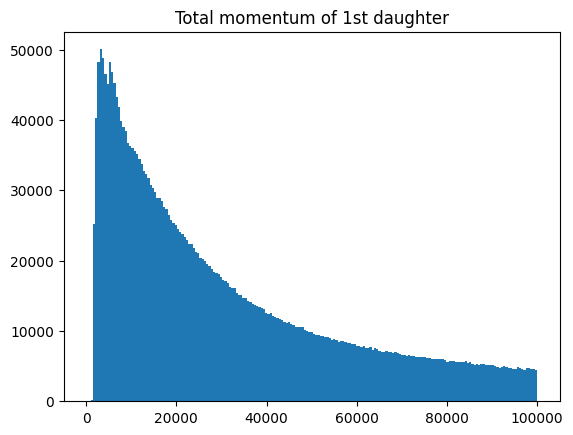

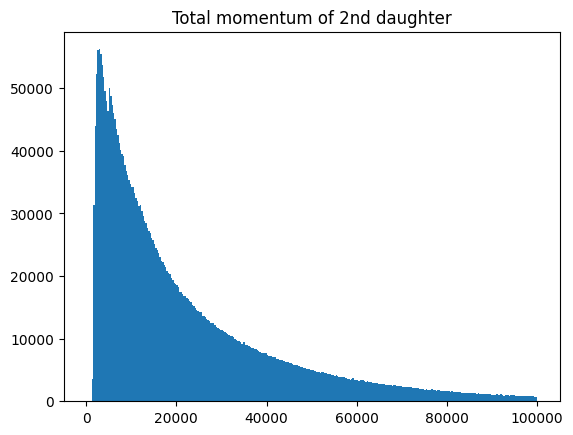

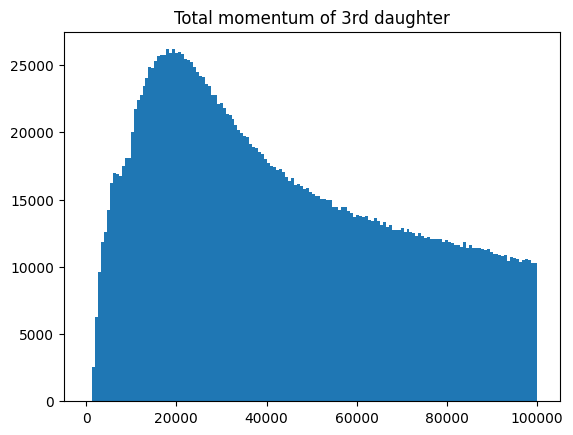

In [150]:
import matplotlib.pyplot as plt
plt.hist(H1_Ptot,bins='auto',range=(0,100000));
plt.title('Total momentum of 1st daughter')
plt.show()
plt.hist(H2_Ptot,bins='auto',range=(0,100000));
plt.title('Total momentum of 2nd daughter')
plt.show()
plt.hist(H3_Ptot,bins='auto',range=(0,100000));
plt.title('Total momentum of 3rd daughter')
plt.show()

The third daughter is surprisingly dissimilar, but once we start slicing the data the discrepancy should disappear.

Now plot the total momentum for the mother (M_Ptot)

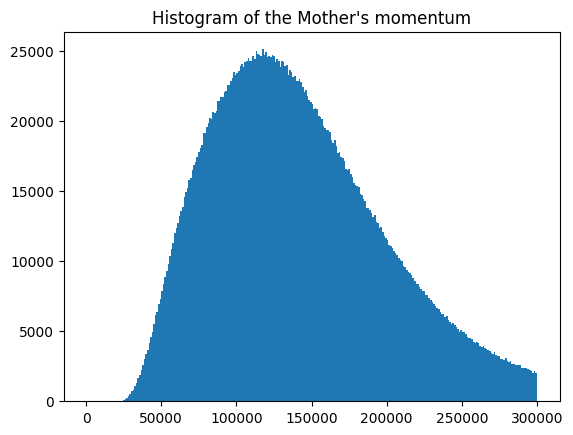

In [148]:
#use the histogram plotting tools, plot the momentum of the mother
MPx=data['H2_PX']+data['H1_PX']+data['H3_PX']
MPy=data['H2_PY']+data['H1_PY']+data['H3_PY']
MPz=data['H2_PZ']+data['H1_PZ']+data['H3_PZ']
MP_tot=(MPx**2+MPy**2+MPz**2)**0.5
plt.hist(MP_tot,bins='auto',range=(0,300000));
plt.title("Histogram of the Mother's momentum")
plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [19]:
tree.Show(45)

======> EVENT:45
 B_FlightDistance = 4.71407
 B_VertexChi2    = 11.5278
 H1_PX           = 133.376
 H1_PY           = -1293.52
 H1_PZ           = 33534.2
 H1_ProbK        = 0.00735235
 H1_ProbPi       = 0.204907
 H1_Charge       = 1
 H1_IPChi2       = 22.9885
 H1_isMuon       = 0
 H2_PX           = 518.943
 H2_PY           = -1966.2
 H2_PZ           = 52184.7
 H2_ProbK        = 0.00482044
 H2_ProbPi       = 0.266655
 H2_Charge       = -1
 H2_IPChi2       = 20.5652
 H2_isMuon       = 0
 H3_PX           = 1383.62
 H3_PY           = -2008.35
 H3_PZ           = 12154
 H3_ProbK        = 0.0800247
 H3_ProbPi       = 0.403711
 H3_Charge       = -1
 H3_IPChi2       = 1584.95
 H3_isMuon       = 0


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

In [20]:
# sticking together all of the code above here is a function that takes an awkard array and spits out a list of masses
def M_mass(data):
  # the total momenta of each particle
  H1_Ptot=np.sqrt(data['H1_PX']**2+data['H1_PY']**2+data['H1_PZ']**2)
  H2_Ptot=np.sqrt(data['H2_PX']**2+data['H2_PY']**2+data['H2_PZ']**2)
  H3_Ptot=np.sqrt(data['H3_PX']**2+data['H3_PY']**2+data['H3_PZ']**2)
  # the momentum of the mother
  MPx=data['H2_PX']+data['H1_PX']+data['H3_PX']
  MPy=data['H2_PY']+data['H1_PY']+data['H3_PY']
  MPz=data['H2_PZ']+data['H1_PZ']+data['H3_PZ']
  MP_tot=(MPx**2+MPy**2+MPz**2)**0.5
  # mass of a Kaon
  m_K=493.677
  # total energies
  H1_E=(H1_Ptot**2+m_K**2)**0.5
  H2_E=(H2_Ptot**2+m_K**2)**0.5
  H3_E=(H3_Ptot**2+m_K**2)**0.5
  M_E=H1_E+H2_E+H3_E
  # mass of the mother
  M_m=(M_E**2-MP_tot**2)**0.5
  return M_m

In [21]:
M_m=M_mass(data)

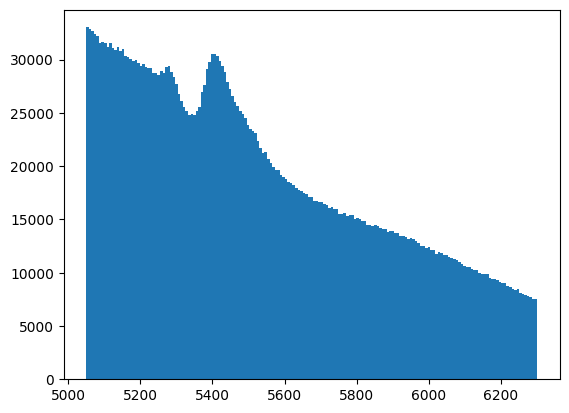

In [22]:
#Now plot a histogram of the range of masses of the B meson.
plt.hist(M_m,bins='auto');
plt.show()
#Does this match what we would expect from theory?

The biggest peak is around 5450, but we'd expect a larger peak around 5300. Once we start slicing it should become clearer.

**We** know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

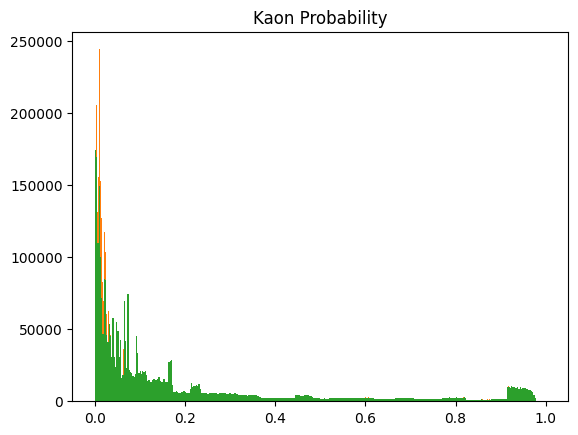

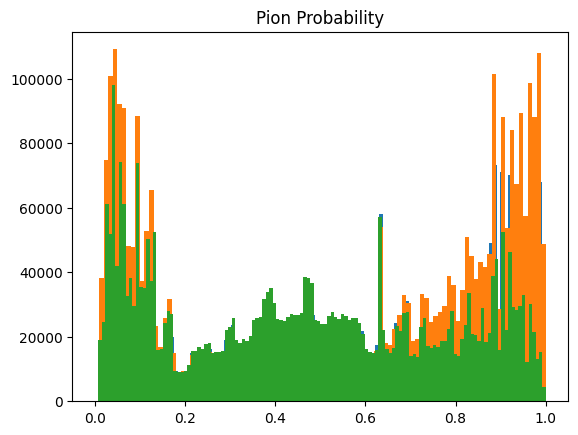

In [152]:
# plots all the Kaon probabilities together
plt.hist(data['H1_ProbK'],bins=1000,range=(0,1));
plt.hist(data['H2_ProbK'],range=(0,1),bins='auto');
plt.hist(data['H3_ProbK'],range=(0,1),bins='auto');
plt.title('Kaon Probability')
plt.show()
# plots all the Pion probabilities together
plt.hist(data['H1_ProbPi'],range=(0,1),bins='auto');
plt.hist(data['H2_ProbPi'],range=(0,1),bins='auto');
plt.hist(data['H3_ProbPi'],range=(0,1),bins='auto');
plt.title('Pion Probability')
plt.show()
#For all our particles, make a plot of the B_VertexChi2

This shows that the vast majority of detections were not Kaons but a couple almost definitely were.

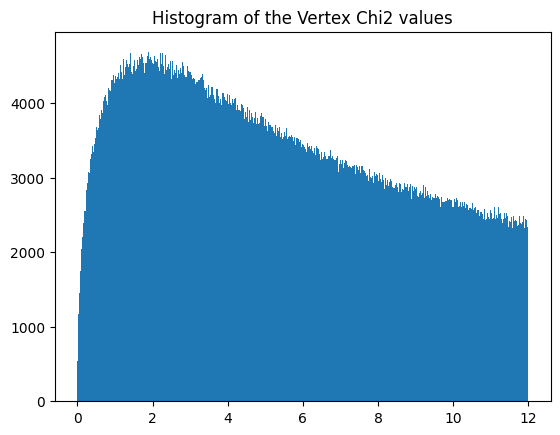

In [146]:
# plots a histogram of the VertexChi2 values
B_Chi2=tree2.arrays('B_VertexChi2')
plt.hist(B_Chi2['B_VertexChi2'],bins=1000);
plt.title('Histogram of the Vertex Chi2 values')
plt.show()

This shows that most of the data points probably came from the same point, and that any that didnt have already been removed from the selection.

In [25]:
# this selection is broader than i wouldve thought at first, but trimming it any tighter doesnt leave enough data to work with
selections="((H1_ProbK>H1_ProbPi)&(H2_ProbK>H2_ProbPi)&(H3_ProbK>H3_ProbPi)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0))"


In [27]:
CutData=tree2.arrays(cut=selections)

In [29]:
# checking how many datapoints are left
len(CutData)

25974

In [32]:
# calculates the mass spread for the cut data
M_m1=M_mass(CutData)

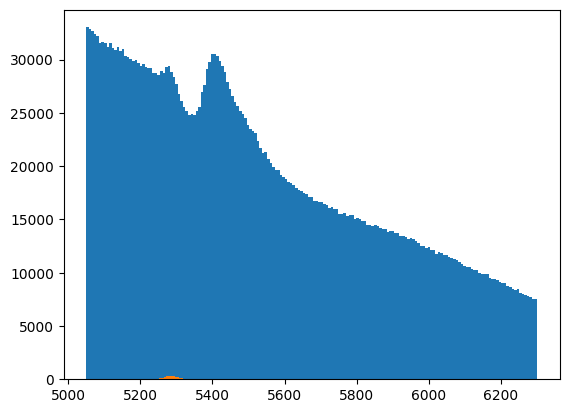

In [33]:
plt.hist(M_m,bins='auto');
plt.hist(M_m1,bins=1000);
plt.show()

The data cutting shows that the larger peak was actually false and the real peak was hiding.

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [35]:
! pip install scipy
import scipy

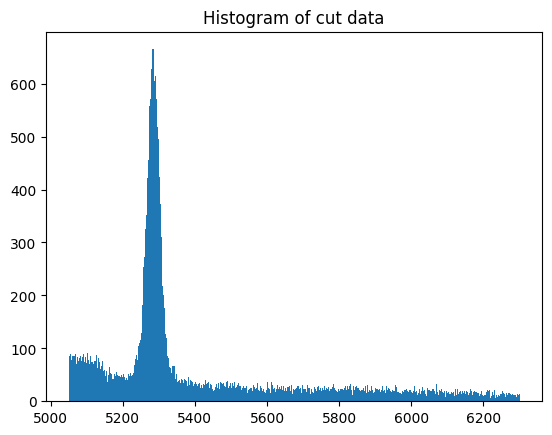

In [153]:
plt.hist(M_m1,bins=500);
plt.title('Histogram of cut data')
plt.show()

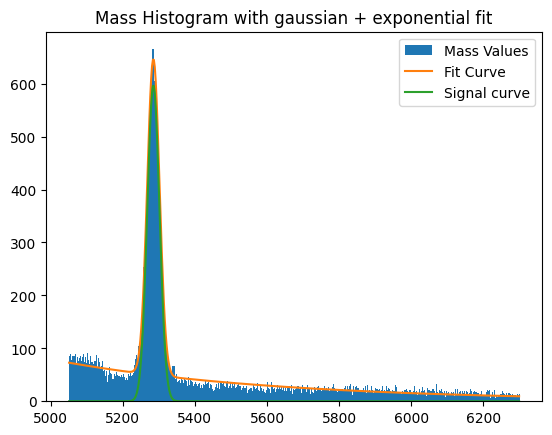

In [138]:
from scipy.optimize import curve_fit
# a gaussian model for the signal
def model_gauss(x, amplitude, mean, stddev):
    return amplitude*np.exp(-(x - mean)**2 / (2 * stddev**2))
# an exponential model for the background
def model_exp(x,amplitude,decay):
    return amplitude*np.exp(-decay*x)
# a combination of the two
def model_curve(x,amp_gauss,mean,stddev,amp_exp,decay):
    return model_exp(x,amp_exp,decay)+model_gauss(x,amp_gauss,mean,stddev)
bins=500
# defining a function that makes a histogram and then fits the model to it
guess_vals=[320,5300,2,100,1e-4]
def model_fit(model,data,bins,guess):
  bin_contents, bin_edges = np.histogram(data, bins=bins)
  y_data=np.array(bin_contents)
  x_data=np.array((bin_edges[:-1] + bin_edges[1:])/2)
  fit_vals, cov = curve_fit(model, x_data, y_data,guess)
  return x_data , y_data, fit_vals
x_data,y_data,fit_vals=model_fit(model_curve,M_m1,bins,guess_vals)
# plotting the data along with the fitted curves
y_fit= model_curve(x_data, *fit_vals)
signal=model_gauss(x_data,*fit_vals[:3])
plt.hist(M_m1,bins=bins,label='Mass Values');
plt.plot(x_data,y_fit,label='Fit Curve');
plt.plot(x_data,signal,label='Signal curve')
plt.title('Mass Histogram with gaussian + exponential fit')
plt.legend()
plt.show()

In [39]:
# since im not using root finding the amount of events is a little cursed
# i made an approximation by taking the center of each bin and multiplying it by the signal value at that point
# effectively integrating it (an actual integral wouldnt work since the data is discrete)
def event_num(x_data,fit_vals,signal_model):
  event_num=0
  for i in x_data:
    event_num+=signal_model(i,*fit_vals)
  return event_num
print(event_num(x_data,fit_vals[:3],model_gauss))

10192.168806235148


In [40]:
# since I resolutely refuse to use ROOT I looked up how it calculates its histogram errors
# turns out it just takes the square root of the histogram values
# I dont know why it does that and it seems kinda stupid but Im gonna do the same
# defining a chi squared function:
def chi2(model,x_data,y_data,fit_vals):
  chi2_val=0
  for i in range(len(x_data)):
    chi2_val+=(model(x_data[i],*fit_vals)-y_data[i])**2/y_data[i]
  # normally chi squared would return a value close to N (in this case the number of bins) since root returns a value close to 1 i normalised the chi squared with N
  return chi2_val/len(x_data)

In [139]:
print(chi2(model_curve,x_data,y_data,fit_vals))

1.8469387848570171


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [42]:
# splits the data into plus and minus
# not the most efficient way of doing this but for such a small dataset its fine
import awkward as ak

plusData=[]
minusData=[]
for i in CutData:
  if i['H1_Charge']+i['H2_Charge']+i['H3_Charge']==-1:
    minusData.append(i)
  elif i['H1_Charge']+i['H2_Charge']+i['H3_Charge']==1:
    plusData.append(i)
  else: continue
plusData=ak.Array(plusData)
minusData=ak.Array(minusData)

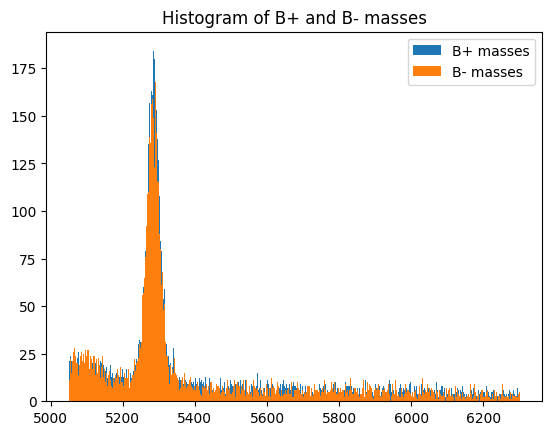

In [129]:
M_plus=M_mass(plusData)
M_minus=M_mass(minusData)
plt.hist(M_plus,bins=1000,label='B+ masses');
plt.hist(M_minus,bins=1000,label='B- masses');
plt.title('Histogram of B+ and B- masses')
plt.legend()
plt.show()


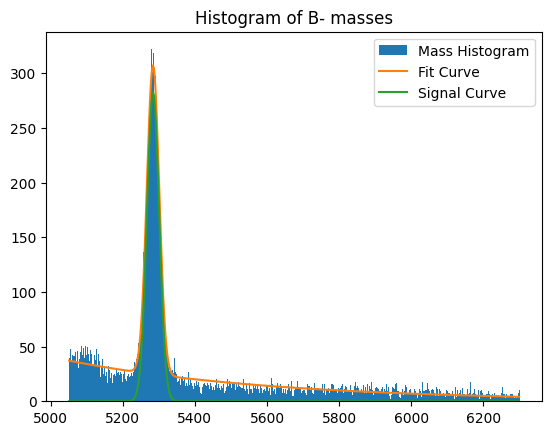

4852.126381185933


In [136]:
minus_x,minus_y,minus_fit=model_fit(model_curve,M_minus,bins,guess_vals)

plt.hist(M_minus,bins=bins, label='Mass Histogram');
plt.plot(minus_x,model_curve(minus_x,*minus_fit),label='Fit Curve');
plt.plot(minus_x,model_gauss(minus_x,*minus_fit[:3]),label='Signal Curve')
plt.title('Histogram of B- masses')
plt.legend()
plt.show()
minus_num=event_num(minus_x,minus_fit[:3],model_gauss)
print(minus_num)

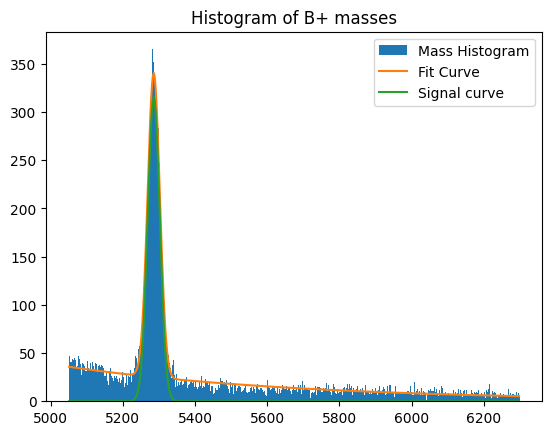

5334.658647784694


In [125]:
plus_x,plus_y,plus_fit=model_fit(model_curve,M_plus,bins,guess_vals)

plt.hist(M_plus,bins=bins,label='Mass Histogram');
plt.plot(plus_x,model_curve(plus_x,*plus_fit),label='Fit Curve');
plt.plot(plus_x,model_gauss(plus_x,*plus_fit[:3]),label='Signal curve')
plt.title('Histogram of B+ masses')
plt.legend()
plt.show()
plus_num=event_num(plus_x,plus_fit[:3],model_gauss)
print(plus_num)

In [46]:
# calculate the assymetry
Ass=(minus_num-plus_num)/(minus_num+plus_num)
print(Ass)

-0.047368454838937674


In [47]:
# calculates the error
sigma=((1-Ass**2)/(plus_num+minus_num))**0.5
print(sigma)

0.009896774008126082


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

In [48]:
#  the value is clearly significant but not very big, I dont really have any concept of scale but Im assuming this is relatively meaningful

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


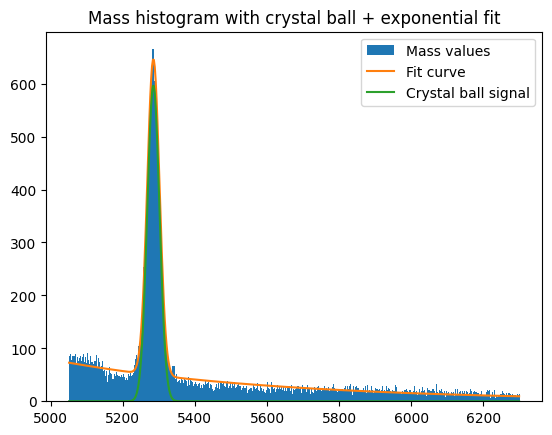

In [135]:
# while i would very much like to do the bonus content i dont really have time for making it work in spite of ROOT
# so im just gonna try some more model curves
import warnings
warnings.simplefilter("ignore", RuntimeWarning)
# this is a crystal ball combined with exponential
def model_crystal(x, amplitude, mean, stddev,a,n):
    con=-a<(x-mean)/stddev
    con2=-a>=(x-mean)/stddev
    f= np.where(con,amplitude*np.exp(-(x - mean)**2 / (2 * stddev**2)),x)
    f= np.where(con2,amplitude*(n/a)**n*np.exp(-(a**2)/2)*(n/a-a-(f-mean)/stddev)**(-n),f)
    return f
def model_curve2(x,amp_cryst,mean,stddev,a,n,amp_exp,decay):
    return model_exp(x,amp_exp,decay)+model_crystal(x,amp_cryst,mean,stddev,a,n)
crystal_guess=[320,5300,2,2,2,100,1e-4]
x_data2,y_data2,fit_vals2=model_fit(model_curve2,M_m1,bins,crystal_guess)
y_fit2= model_curve2(x_data2, *fit_vals2)
signal2=model_crystal(x_data2,*fit_vals2[:5])
plt.hist(M_m1,bins=bins,label='Mass values');
plt.plot(x_data2,y_fit2,label='Fit curve');
plt.plot(x_data2,signal2,label='Crystal ball signal');
plt.title('Mass histogram with crystal ball + exponential fit')
plt.legend()
plt.show()

In [142]:
print(event_num(x_data,fit_vals2[:5],model_crystal))

10192.169102676879


In [143]:
print(chi2(model_curve2,x_data,y_data,fit_vals2))

1.8469372806197708


This isn't all that useful since it's completely identical to just using a gaussian.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)